In [49]:
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
%matplotlib inline

### Anaylzing the metrics

The three metric we are combing to find the safest neighborhood are non-traffic citations, incident reports and parks. 

In [51]:
# non-traffic citations
citation_df = pd.read_csv("nontraffic_citations.csv")
citation_counts = citation_df['NEIGHBORHOOD'].value_counts()
citation_counts_df = citation_counts.reset_index()
citation_counts_df.columns = ['Neighborhood', 'Citation_Count']

In [52]:
# police incidents
crime = pd.read_csv("crime_rates.csv")
neighborhood = crime['INCIDENTNEIGHBORHOOD'].value_counts()
crime_counts_df = neighborhood.reset_index()
crime_counts_df.columns = ['Neighborhood','Incident_Count']

In [53]:
# parks
park_df = pd.read_csv("parks.csv")
park_count = park_df['neighborhood'].value_counts()
park_count_df = park_count.reset_index()
park_count_df.columns = ['Neighborhood', 'Park_Count']


<Axes: title={'center': 'Top 10 Park Counts by Neighborhood'}, xlabel='Neighborhood'>

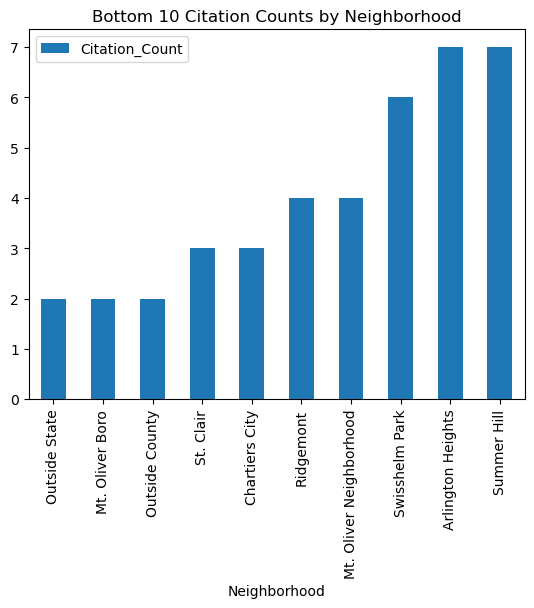

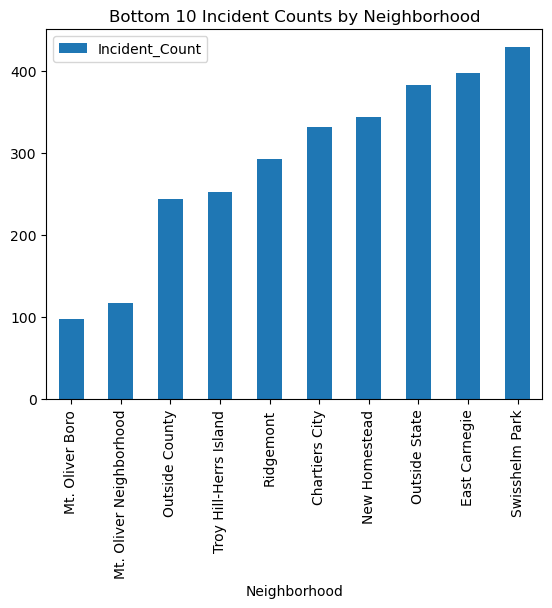

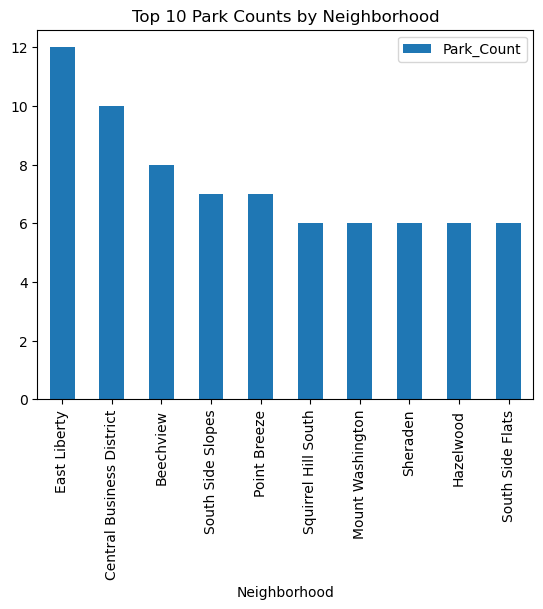

In [66]:
bot_10_citation = citation_counts_df.tail(10)
bot_10_citation = bot_10_citation.sort_values(by='Citation_Count', ascending=True)
bot_10_citation.plot.bar(x='Neighborhood', y='Citation_Count', title="Bottom 10 Citation Counts by Neighborhood")

bot_10_incident = crime_counts_df.tail(10)
bot_10_incident = bot_10_incident.sort_values(by='Incident_Count', ascending=True)
bot_10_incident.plot.bar(x='Neighborhood', y='Incident_Count', title="Bottom 10 Incident Counts by Neighborhood")

top_10_park = park_count_df.head(10)
top_10_park = top_10_park.sort_values(by='Park_Count', ascending=False)
top_10_park.plot.bar(x='Neighborhood', y='Park_Count', title="Top 10 Park Counts by Neighborhood")

In [54]:
# merge data frames into one
merge_dfs = pd.merge(citation_counts_df, crime_counts_df, on='Neighborhood')
metrics_df = pd.merge(merge_dfs,park_count_df, on='Neighborhood')


### Normalizing the Data

In the section below, we normalized the data, to have a value between 0 and 1. This brings all the different data to a common scale, since they all had a different range of values. 

In [56]:
#normalize data
citations = metrics_df['Citation_Count']
metrics_df['Citation_Count'] = (citations - citations.min()) / (citations.max() - citations.min())

incidents = metrics_df['Incident_Count']
metrics_df['Incident_Count'] = (incidents - incidents.min()) / (incidents.max() - incidents.min())

parks = metrics_df['Park_Count']
metrics_df['Park_Count'] = (parks - parks.min()) / (parks.max() - parks.min())

print(metrics_df)

                 Neighborhood  Citation_Count  Incident_Count  Park_Count
0            South Side Flats        1.000000        0.963581    0.454545
1   Central Business District        0.586126        1.000000    0.818182
2             Central Oakland        0.192828        0.251250    0.272727
3                 North Shore        0.167549        0.174043    0.181818
4                     Carrick        0.128748        0.596337    0.181818
..                        ...             ...             ...         ...
67                    Oakwood        0.000882        0.014210    0.000000
68              Regent Square        0.000882        0.011157    0.000000
69                       Hays        0.000882        0.011263    0.000000
70              New Homestead        0.000588        0.000000    0.000000
71             Swisshelm Park        0.000000        0.004473    0.181818

[72 rows x 4 columns]


### Ranking the Data

After normalzing the data, we ranked the neighborhoods for each metric. The higher a neighborhoods citation and incident number, the higher they got ranked. For parks, it was the opposite, the higher the number, the lower the rank.

After the data has been ranked, we took the average of each neighborhood's ranks. The idea behind this is the neighborhood with the lowest ranking average would be considerd the best neighborhood. 

In [57]:
# Rank neighborhoods, citations and incidents lower is better, parks higher is better
metrics_df['Citation_Rank'] = metrics_df['Citation_Count'].rank(ascending=True)
metrics_df['Incident_Rank'] = metrics_df['Incident_Count'].rank(ascending=True)
metrics_df['Park_Rank'] = metrics_df['Park_Count'].rank(ascending=False)

print(metrics_df)


                 Neighborhood  Citation_Count  Incident_Count  Park_Count  \
0            South Side Flats        1.000000        0.963581    0.454545   
1   Central Business District        0.586126        1.000000    0.818182   
2             Central Oakland        0.192828        0.251250    0.272727   
3                 North Shore        0.167549        0.174043    0.181818   
4                     Carrick        0.128748        0.596337    0.181818   
..                        ...             ...             ...         ...   
67                    Oakwood        0.000882        0.014210    0.000000   
68              Regent Square        0.000882        0.011157    0.000000   
69                       Hays        0.000882        0.011263    0.000000   
70              New Homestead        0.000588        0.000000    0.000000   
71             Swisshelm Park        0.000000        0.004473    0.181818   

    Citation_Rank  Incident_Rank  Park_Rank  
0            72.0           7

In [59]:
metrics_df["Avg_rank"] = metrics_df[['Citation_Rank', 'Incident_Rank', 'Park_Rank']].mean(axis=1)

best_neighborhood = metrics_df.sort_values(by='Avg_rank')
print(best_neighborhood[['Neighborhood', 'Avg_rank']])

           Neighborhood   Avg_rank
71       Swisshelm Park   9.666667
66        Spring Garden  19.166667
63          Polish Hill  20.500000
53  Upper Lawrenceville  20.666667
51             Westwood  21.000000
..                  ...        ...
4               Carrick  54.333333
12       Homewood North  54.500000
22           East Hills  55.000000
13        North Oakland  57.333333
11       Homewood South  62.000000

[72 rows x 2 columns]


### The Results

In [60]:
top_10_neighborhoods = []
cnt = 1
for i in best_neighborhood['Neighborhood']:
    if cnt == 11:
        break
    print(cnt, ". ", i, sep="")
    cnt += 1
    
    

1. Swisshelm Park
2. Spring Garden
3. Polish Hill
4. Upper Lawrenceville
5. Westwood
6. Duquesne Heights
7. New Homestead
8. Troy Hill
9. Regent Square
10. Hays
